In [1]:
%matplotlib inline


# Density and Contour Plots

While individual point data are useful, we commonly want to understand the
the distribution of our data within a particular subspace, and compare that
to a reference or other dataset. Pyrolite includes a few functions for
visualising data density, most based on Gaussian kernel density estimation
and evaluation over a grid. The below examples highlight some of the currently
implemented features.


In [3]:
!pip3 install pyrolite

  Using cached pyrolite-0.3.2-py3-none-any.whl (586 kB)
  Using cached mpltern-0.3.4-py3-none-any.whl (19 kB)
  Using cached sympy-1.10.1-py3-none-any.whl (6.4 MB)
  Using cached periodictable-1.6.1-py2.py3-none-any.whl (752 kB)
  Using cached tinydb-4.7.0-py3-none-any.whl (24 kB)
  Attempting uninstall: sympy
    Found existing installation: sympy 1.6.2
    Uninstalling sympy-1.6.2:
      Successfully uninstalled sympy-1.6.2


In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pyrolite.comp.codata import close
from pyrolite.plot import pyroplot
from pyrolite.plot.density import density


np.random.seed(82)

/Users/brettlv/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
/Users/brettlv/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


First we create some example data :




In [5]:
oxs = ["SiO2", "CaO", "MgO", "Na2O"]
ys = np.random.rand(1000, len(oxs))
ys[:, 1] += 0.7
ys[:, 2] += 1.0
df = pd.DataFrame(data=close(np.exp(ys)), columns=oxs)

A minimal density plot can be constructed as follows:




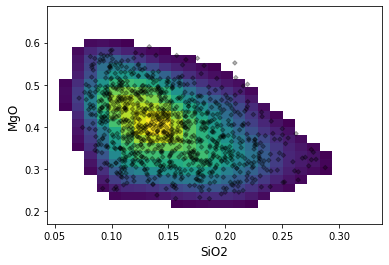

In [6]:
ax = df.loc[:, ["SiO2", "MgO"]].pyroplot.density()
df.loc[:, ["SiO2", "MgO"]].pyroplot.scatter(ax=ax, s=10, alpha=0.3, c="k", zorder=2)
plt.show()

A colorbar linked to the KDE estimate colormap can be added using the `colorbar`
boolean switch:




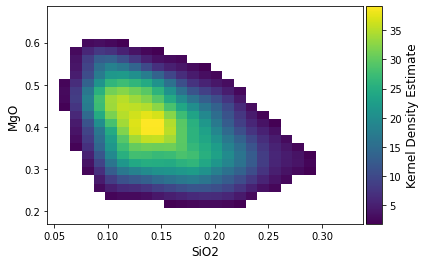

In [7]:
ax = df.loc[:, ["SiO2", "MgO"]].pyroplot.density(colorbar=True)
plt.show()

`density` by default will create a new axis, but can also be plotted over an
existing axis for more control:




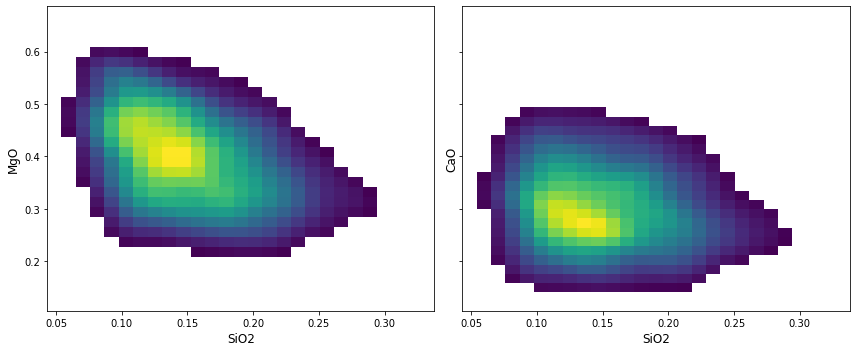

In [8]:
fig, ax = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(12, 5))

df.loc[:, ["SiO2", "MgO"]].pyroplot.density(ax=ax[0])
df.loc[:, ["SiO2", "CaO"]].pyroplot.density(ax=ax[1])

plt.tight_layout()
plt.show()

There are two other implemented modes beyond the default `density`: `hist2d` and
`hexbin`, which parallel their equivalents in matplotlib.
Contouring is not enabled for these histogram methods.




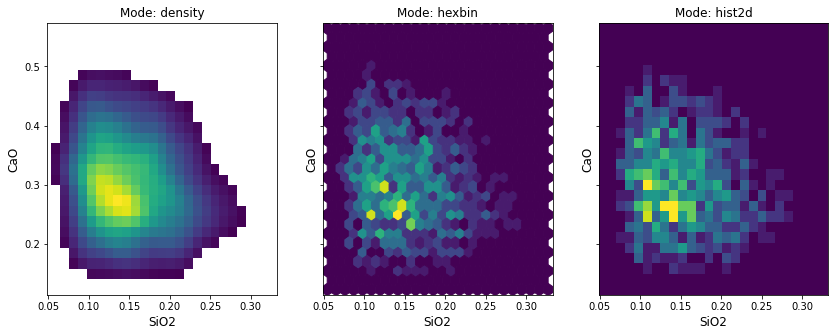

In [9]:
fig, ax = plt.subplots(1, 3, sharex=True, sharey=True, figsize=(14, 5))
for a, mode in zip(ax, ["density", "hexbin", "hist2d"]):
    df.loc[:, ["SiO2", "CaO"]].pyroplot.density(ax=a, mode=mode)
    a.set_title("Mode: {}".format(mode))
plt.show()

For the ``density`` mode, a ``vmin`` parameter is used to choose the lower
threshold, and by default is the 99th percentile (``vmin=0.01``), but can be
adjusted. This is useful where there are a number of outliers, or where you wish to
reduce the overall complexity/colour intensity of a figure (also good for printing!).




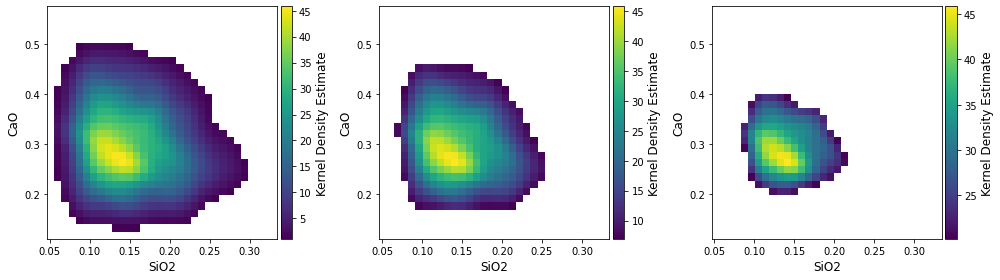

In [10]:
fig, ax = plt.subplots(1, 3, figsize=(14, 4))
for a, vmin in zip(ax, [0.01, 0.1, 0.4]):
    df.loc[:, ["SiO2", "CaO"]].pyroplot.density(ax=a, bins=30, vmin=vmin, colorbar=True)
plt.tight_layout()
plt.show()

In [11]:
plt.close("all")  # let's save some memory..

Density plots can also be used for ternary diagrams, where more than two components
are specified:




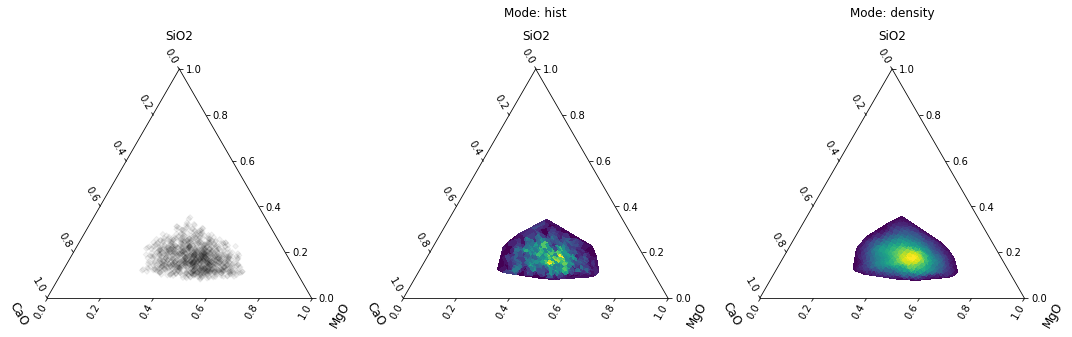

In [12]:
fig, ax = plt.subplots(
    1,
    3,
    sharex=True,
    sharey=True,
    figsize=(15, 5),
    subplot_kw=dict(projection="ternary"),
)
df.loc[:, ["SiO2", "CaO", "MgO"]].pyroplot.scatter(ax=ax[0], alpha=0.05, c="k")
for a, mode in zip(ax[1:], ["hist", "density"]):
    df.loc[:, ["SiO2", "CaO", "MgO"]].pyroplot.density(ax=a, mode=mode)
    a.set_title("Mode: {}".format(mode), y=1.2)

plt.tight_layout()
plt.show()

Contours are also easily created, which by default are percentile estimates of the
underlying kernel density estimate.

<div class="alert alert-info"><h4>Note</h4><p>As the contours are generated from kernel density estimates, assumptions
       around e.g. 95% of points lying within a 95% contour won't necessarily be valid
       for non-normally distributed data (instead, this represents the approximate 95%
       percentile on the kernel density estimate). Note that contours are currently only
       generated; for `mode="density"`; future updates may allow the use of a histogram
       basis, which would give results closer to 95% data percentiles.</p></div>




In [14]:
df.loc[:, ["SiO2", "CaO"]]

SiO2       CaO
0    0.106342  0.308174
1    0.097541  0.317758
2    0.118281  0.222131
3    0.142597  0.405031
4    0.207805  0.366437
..        ...       ...
995  0.113961  0.245899
996  0.175992  0.404701
997  0.172929  0.279400
998  0.219087  0.219974
999  0.157293  0.347663

[1000 rows x 2 columns]

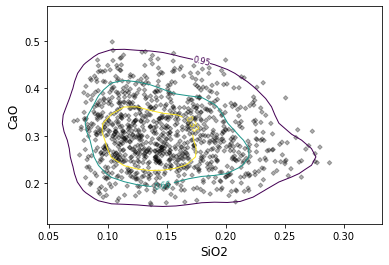

In [13]:
ax = df.loc[:, ["SiO2", "CaO"]].pyroplot.scatter(s=10, alpha=0.3, c="k", zorder=2)
df.loc[:, ["SiO2", "CaO"]].pyroplot.density(ax=ax, contours=[0.95, 0.66, 0.33])
plt.show()

You can readily change the styling of these contours by passing `cmap` (for different
colormaps), `colors` (for bulk or individually specified colors), `linewidths`
and `linestyles` (for bulk or individually specified linestyles). You can also
use 'label_contours=False` to omit the contour labels. For example,
to change the colormap and omit the contour labels:




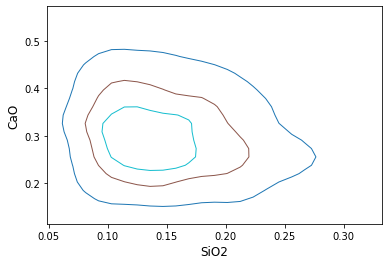

In [15]:
ax = df.loc[:, ["SiO2", "CaO"]].pyroplot.density(
    contours=[0.95, 0.66, 0.33], cmap="tab10", label_contours=False
)
plt.show()

You can specify one styling value for all contours:




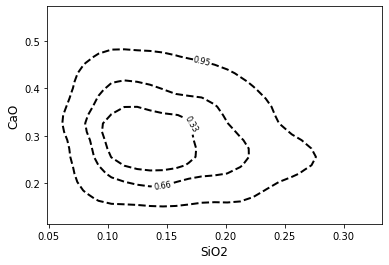

In [16]:
ax = df.loc[:, ["SiO2", "CaO"]].pyroplot.density(
    contours=[0.95, 0.66, 0.33], linewidths=2, linestyles="--", colors="k"
)
plt.show()

Or specify a list of values which will be applied to the contours in the order
given in the `contours` keyword argument:




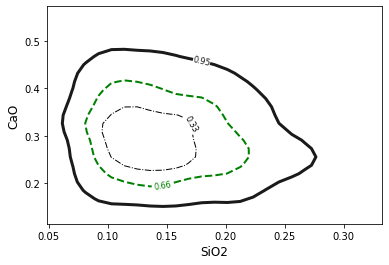

In [21]:
ax = df.loc[:, ["SiO2", "CaO"]].pyroplot.density(
    contours=[0.95, 0.66, 0.33],
    linewidths=[3, 2, 1],
    linestyles=["-", "--", "-."],
    colors=["0.1", "g", "k"],
)
plt.show()

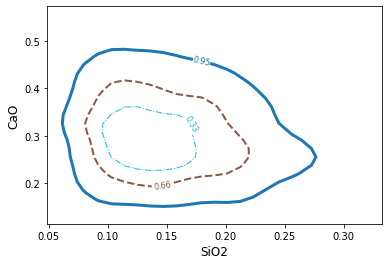

In [23]:
ax = df.loc[:, ["SiO2", "CaO"]].pyroplot.density(
    contours=[0.95, 0.66, 0.33],
    linewidths=[3, 2, 1],
    linestyles=["-", "--", "-."],
    #colors=["0.1", "g", "k"],
    cmap="tab10", 
)
plt.show()

If for some reason the density plot or contours are cut off on the edges, it may be
that the span of the underlying grid doesn't cut it (this is often the case for just
a small number of points). You can either manually adjust the extent (
`extent = (min_x, max_x, min_y, max_y)` ) or adjust the coverage scale (
e.g. `coverage_scale = 1.5` will increase the buffer from the default 10% to 25%).
You can also adjust the number of bins in the underlying grid (either for both axes
with e.g. `bins=100` or individually with `bins=(<xbins>, <ybins>)`):




/Users/brettlv/anaconda3/lib/python3.8/site-packages/pyrolite/util/plot/density.py:203: UserWarning: The following kwargs were not used by contour: 'coverage_scale'
  cs = contour(


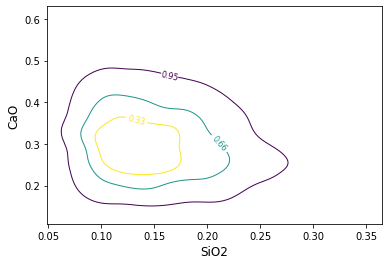

In [25]:
ax = df.loc[:, ["SiO2", "CaO"]].pyroplot.density(
    contours=[0.95, 0.66, 0.33], coverage_scale=1.5, 
    bins=100
)
plt.show()

Geochemical data is commonly log-normally distributed and is best analysed
and visualised after log-transformation. The density estimation can be conducted
over logspaced grids (individually for x and y axes using `logx` and `logy` boolean
switches). Notably, this makes both the KDE image and contours behave more naturally:




In [26]:
# some assymetric data
from scipy import stats

xs = stats.norm.rvs(loc=6, scale=3, size=(200, 1))
ys = stats.norm.rvs(loc=20, scale=3, size=(200, 1)) + 5 * xs + 50
data = np.append(xs, ys, axis=1).T
asym_df = pd.DataFrame(np.exp(np.append(xs, ys, axis=1) / 25.0))
asym_df.columns = ["A", "B"]
grids = ["linxy", "logxy"] * 2 + ["logx", "logy"]
scales = ["linscale"] * 2 + ["logscale"] * 2 + ["semilogx", "semilogy"]
labels = ["{}-{}".format(ls, ps) for (ls, ps) in zip(grids, scales)]
params = list(
    zip(
        [
            (False, False),
            (True, True),
            (False, False),
            (True, True),
            (True, False),
            (False, True),
        ],
        grids,
        scales,
    )
)

In [31]:
xs.shape,ys.shape,data.shape

((200, 1), (200, 1), (2, 200))

In [30]:
data#.shape

array([[ 4.04621773e+00,  3.61438479e+00,  2.25300365e+00,
         9.16790738e+00,  5.47582365e+00,  5.24019808e+00,
         6.92844084e+00,  4.75887637e+00,  2.47831832e+00,
         5.81163209e+00,  9.09810092e+00,  6.36748683e+00,
         7.33191005e+00,  6.53069129e+00,  5.78026580e+00,
         4.70968340e+00,  7.83251684e+00,  4.37590107e+00,
         1.27057005e+01,  7.42417898e+00,  5.56833471e+00,
         3.58168454e+00,  7.30459746e+00,  8.38964631e+00,
         5.74643359e+00,  3.87383853e+00,  7.96113654e+00,
         1.47610410e+01,  5.82770966e+00,  7.41451412e+00,
         4.89738670e+00,  5.58144028e+00,  5.29416227e+00,
         6.67023663e+00,  7.69547819e+00,  4.87504912e+00,
         8.40853556e+00,  9.35928343e+00,  5.52454754e+00,
         4.27653025e+00,  7.45331553e+00,  1.71290182e+00,
         6.87378732e+00,  4.04822733e+00,  6.51150492e+00,
         8.10428451e+00,  1.12992866e+01,  6.52240927e+00,
         1.12314625e+00,  1.02262850e+01,  1.14787004e+0

In [34]:
params

[((False, False), 'linxy', 'linscale'),
 ((True, True), 'logxy', 'linscale'),
 ((False, False), 'linxy', 'logscale'),
 ((True, True), 'logxy', 'logscale'),
 ((True, False), 'logx', 'semilogx'),
 ((False, True), 'logy', 'semilogy')]

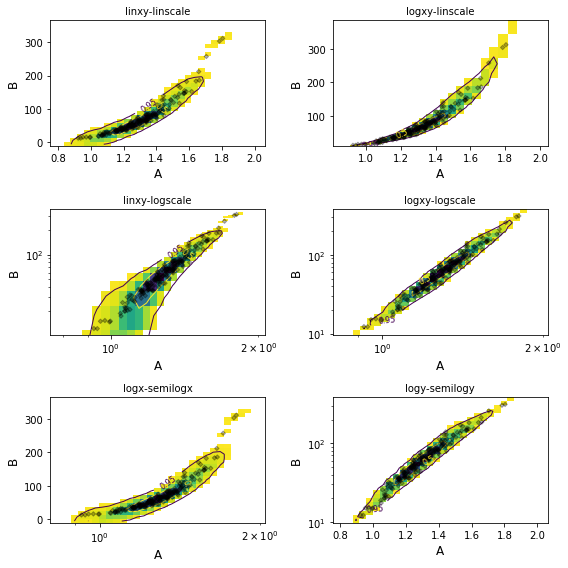

In [32]:
fig, ax = plt.subplots(3, 2, figsize=(8, 8))
ax = ax.flat

for a, (ls, grid, scale) in zip(ax, params):
    lx, ly = ls
    asym_df.pyroplot.density(ax=a, logx=lx, logy=ly, bins=30, cmap="viridis_r")
    asym_df.pyroplot.density(
        ax=a,
        logx=lx,
        logy=ly,
        contours=[0.95, 0.5],
        bins=30,
        cmap="viridis",
        fontsize=10,
    )
    asym_df.pyroplot.scatter(ax=a, s=10, alpha=0.3, c="k", zorder=2)

    a.set_title("{}-{}".format(grid, scale), fontsize=10)
    if scale in ["logscale", "semilogx"]:
        a.set_xscale("log")
    if scale in ["logscale", "semilogy"]:
        a.set_yscale("log")
plt.tight_layout()
plt.show()

In [33]:
plt.close("all")  # let's save some memory..

<div class="alert alert-info"><h4>Note</h4><p>Using alpha with the ``density`` mode induces a known and old matplotlib bug,
          where the edges of bins within a ``pcolormesh`` image (used for plotting the
          KDE estimate) are over-emphasized, giving a gridded look.</p></div>

.. seealso:: `Heatscatter Plots <heatscatter.html>`__,
             `Ternary Plots <ternary.html>`__,
             `Spider Density Diagrams <spider.html>`__



data.shape

data[0,:]

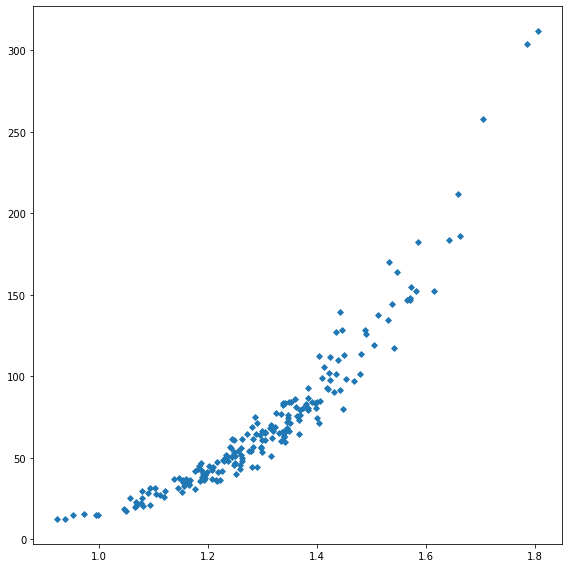

In [45]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
#ax = ax.flat
#ax.scatter(data[0,:],data[1,:])
ax.scatter(asym_df['A'],asym_df['B'])
plt.tight_layout()
plt.show()